# BIBLIOTECAS

In [1]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# DATASETS

In [8]:
features = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Churn-Clientes/kdd/orange_small_test.data', 
                       na_filter=False, engine='python', sep='\t')

features.head(3)       

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1225,7,,,,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,,
1,,,,,,259,0,,,,...,oslk,S46Rt72,LM8l689qOp,,,Qu4f,RAYp,F2FyR07IdsN7I,,
2,,,,,,861,14,,,,...,oslk,CcdTy9x,LM8l689qOp,,,7aLG,RAYp,F2FyR07IdsN7I,,


In [9]:
outcome = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Churn-Clientes/kdd/orange_small_train_churn.labels',
                     header=None)

outcome.head(3)

,0
0,-1
1,1
2,-1


## IDENTIFICANDO VARIAVEIS NUMERICAS E CATEGORICAS

In [10]:
#todas as variaveis
all_vars = np.array(features.columns)

#Variaveis numericas
num_vars = np.array(all_vars[:190])

#Variaveis categoricas
cat_vars = np.array(all_vars[190:])

## TIPO DE DADOS

In [11]:
#Tipo de dados
features.dtypes

Var1      object
Var2      object
Var3      object
Var4      object
Var5      object
           ...  
Var226    object
Var227    object
Var228    object
Var229    object
Var230    object
Length: 230, dtype: object

In [12]:
# Verificando a quantidade de 
var = features.groupby('Var1').size()
var 

Var1
        49312
0         367
104         1
120         1
1288        1
16         73
168         1
24         39
248         1
32         26
352         1
40          9
48         10
56          4
64          2
72          4
8         145
80          3
dtype: int64

In [15]:
# Agrupando as variaveis numericas 
counts_per_column = pd.DataFrame()

for col in num_vars:
    col_count = features.groupby(col).size()
    counts_per_column = counts_per_column.append(col_count, ignore_index=True)

In [16]:
# Visualizando
counts_per_column.T.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
,49312.0,48716.0,48718.0,48362.0,48494.0,5609.0,5623.0,50000.0,49312.0,48494.0,...,5116.0,48362.0,48716.0,48716.0,50000.0,49312.0,49312.0,48716.0,28914.0,49652.0
0,367.0,1280.0,1063.0,1619.0,901.0,899.0,12869.0,NaN,123.0,912.0,...,42072.0,730.0,858.0,799.0,NaN,506.0,203.0,66.0,NaN,3.0
104,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
120,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN
1288,1.0,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Verificando se as variaveis numericas estao corretas (se são somente numericas mesmo)
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)

print('Primeiras dez categorias', counts_per_column.index[:10])
print('Ultimas dez categorias', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias Index(['', '-10', '-100.4284', '-1000068.0', '-1000248.0', '-10003.28',
       '-100034.4', '-10004.56', '-100051.2', '-1000696.0'],
      dtype='object')


In [22]:
# Verificando as variaveis categoricas

# Agrupando
counts_per_column = pd.DataFrame()

for col in cat_vars:
    col_count = features.groupby(col).size()
    counts_per_column = counts_per_column.append(col_count, ignore_index=True)
    
# Verificando se as variaveis numericas estao corretas (se são somente numericas mesmo)
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)

print('Primeiras dez categorias', counts_per_column.index[:10])
print('Ultimas dez categorias', counts_per_column.index[(len(counts_per_column.index)-10):])

In [24]:
# Substituindo os valores nulos por NaN
features = features.replace('', np.nan)

features.head(3)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1225,7,NaN,NaN,NaN,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259,0,NaN,NaN,NaN,...,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,861,14,NaN,NaN,NaN,...,oslk,CcdTy9x,LM8l689qOp,NaN,NaN,7aLG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [26]:
# Alterando o tipo de dados
for col in num_vars:
    features[col] = features[col].astype('float')

for col in cat_vars:
    features[col] = features[col].astype('object')
    
features.dtypes

Var1      float64
Var2      float64
Var3      float64
Var4      float64
Var5      float64
           ...   
Var226     object
Var227     object
Var228     object
Var229     object
Var230     object
Length: 230, dtype: object

# SELEÇÃO DE VARIÁVEIS

In [27]:
#Verificando as variaveis com valores faltantes
features.isna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,True,True
1,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
2,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
3,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
4,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
49996,True,True,True,True,True,False,False,True,True,True,...,False,False,True,True,True,False,False,False,True,True
49997,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
49998,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True


In [29]:
# Verificando quantos dados em branco há em cada coluna
empty_entries_per_columns = features.isna().sum(axis = 0)
empty_entries_per_columns

Var1      49312
Var2      48716
Var3      48718
Var4      48362
Var5      48494
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

48494.0


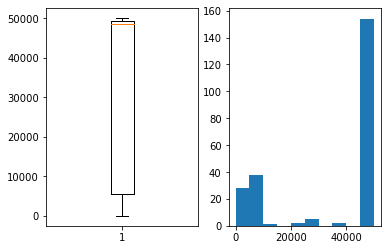

In [31]:
# Plotando os dados para verificar a quantidade de dados faltantes
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(empty_entries_per_columns)
ax2.hist(empty_entries_per_columns)
median = empty_entries_per_columns.median()

print(median)